<a href="https://colab.research.google.com/github/AnnaBea99/Steam_MVP/blob/main/steam_games_classificacao_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Classificação de Jogos Bem Avaliados no Steam

Este notebook treina modelos de Machine Learning para prever se um jogo será **bem avaliado** no Steam com base em atributos como preço, número de reviews, tempo de jogo, gêneros e plataformas.

## 1. Importação de bibliotecas

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## 2. Carregar dataset

In [ ]:

df = pd.read_csv("games.csv",sep=",",quotechar='"',encoding="utf-8-sig",lineterminator="\n",index_col=False)  # ajuste o caminho se necessário
df.head()


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,num,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## 3. Criar variável alvo

Distribuição das classes:
 target
1    0.651694
0    0.348306
Name: proportion, dtype: float64


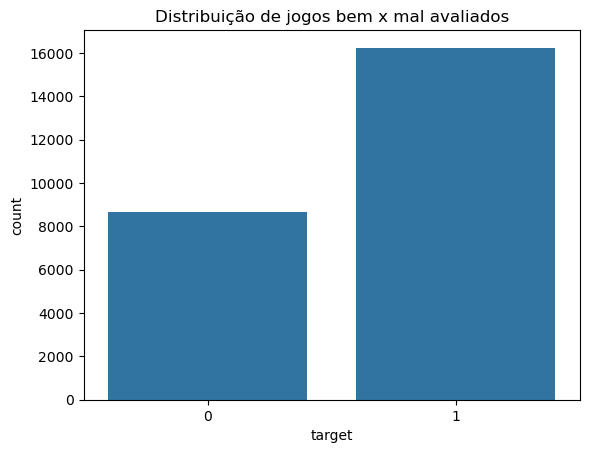

In [ ]:

df = df.dropna(subset=["Positive", "Negative"])
df["total_reviews"] = df["Positive"] + df["Negative"]
df = df[df["total_reviews"] > 50]

df["review_ratio"] = df["Positive"] / df["total_reviews"]
df["target"] = (df["review_ratio"] >= 0.75).astype(int)

print("Distribuição das classes:\n", df["target"].value_counts(normalize=True))
sns.countplot(x=df["target"])
plt.title("Distribuição de jogos bem x mal avaliados")
plt.show()


## 4. Seleção de features

In [ ]:

features_num = ["Price", "total_reviews", "Average playtime forever", "Peak CCU"]
features_cat = ["Genres"]

for col in features_num:
    df[col] = df[col].fillna(0)

for col in features_cat:
    df[col] = df[col].fillna("Unknown")

X = df[features_num + features_cat]
y = df["target"]


## 5. Divisão em treino e teste

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (19929, 5) Test: (4983, 5)


## 6. Pré-processamento

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features_num),
        ("cat", OneHotEncoder(handle_unknown="ignore"), features_cat)
    ]
)


## 7. Treinamento de modelos


=== Logistic ===
              precision    recall  f1-score   support

           0       0.59      0.17      0.26      1736
           1       0.68      0.94      0.79      3247

    accuracy                           0.67      4983
   macro avg       0.63      0.55      0.52      4983
weighted avg       0.65      0.67      0.60      4983



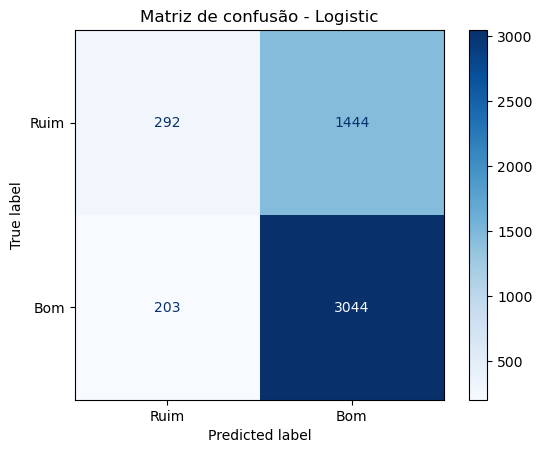

ROC-AUC: 0.64620700923504

=== RandomForest ===
              precision    recall  f1-score   support

           0       0.56      0.41      0.48      1736
           1       0.73      0.83      0.77      3247

    accuracy                           0.68      4983
   macro avg       0.64      0.62      0.62      4983
weighted avg       0.67      0.68      0.67      4983



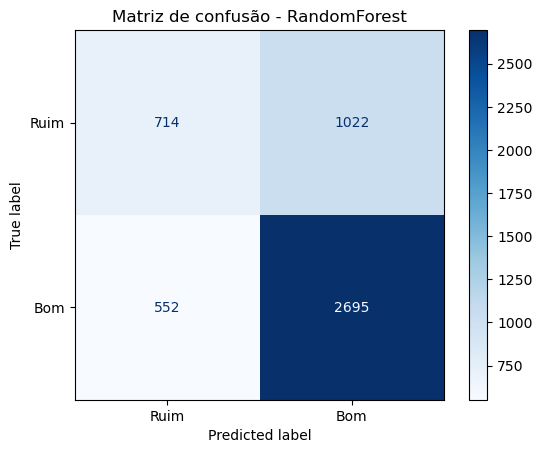

ROC-AUC: 0.7028316815663945


c:\Users\annas\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:55:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0       0.61      0.41      0.49      1736
           1       0.73      0.86      0.79      3247

    accuracy                           0.70      4983
   macro avg       0.67      0.64      0.64      4983
weighted avg       0.69      0.70      0.69      4983



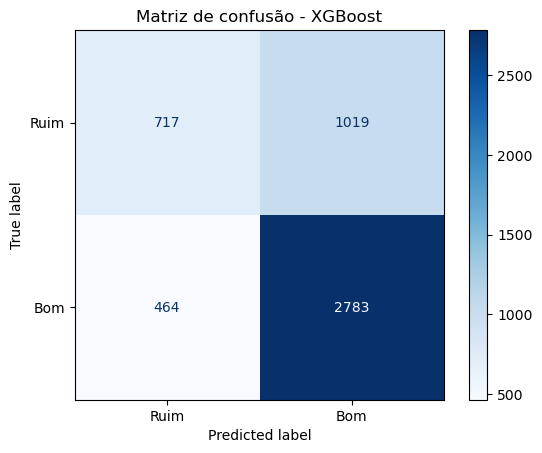

ROC-AUC: 0.7262246859561254


In [ ]:

models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
}

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ruim", "Bom"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de confusão - {name}")
    plt.show()

    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        print("ROC-AUC:", auc)


## 8. Otimização de hiperparâmetros (exemplo com XGBoost)

In [ ]:

param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.3]
}

xgb_pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier(eval_metric="logloss"))])

grid = GridSearchCV(xgb_pipe, param_grid, cv=3, scoring="f1", n_jobs=-1)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor score CV (f1):", grid.best_score_)


Melhores parâmetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Melhor score CV (f1): 0.7931740401925618
